# **ML Project**

*ABOUT THE PROJECT*

Since the bank has an ever-growing client base, it needs to expand the base of borrowers to put in more credit business and attain more profit from interest on loans. So, the bank wants to shift the customers based on debt to customers with personal loans. The department wants a model that will help them identify the potential customers who have a higher probability of purchasing a loan, also at the same time, reduce the cost of campaigns that were devised earlier. 

The dataset given has an entry of 5000 customers. 

The objective of our model should be to predict the probability of a liability customer to purchase a personal loan.

# Importing Libraries & Data



> 1.1 Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




> 1.2 Importing the Data file to work with

In [2]:
from google.colab import files
data = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [3]:
import io
dataset = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')



> 1.3 Viewing the Data



In [4]:
#use head function to see 1st few rows
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#checking the last few columns
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
#seeing the data types of each column and finding the no of Nan Values. These values can be considered as noise.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
#To see the summary of the following data
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Cleaning the Data



 > 2.1 Dropping Irrelevant Data



A large no of irrelevant data( or noise) can hinder the algorith from making accurate predictions. Hence we can always remove columns from data that doesnt seem to logically contribute to the end result. Such as ID column. Moreover, the data in the experiance column has negative integars which is not logically possible, thus data cleaning is necessary

In [8]:
experience = dataset['Experience']
age = dataset['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

Since the correlation between both the columns are very high, both essentially gives us the same information. So we can either drop the experience column or correct the information int the experience with the median.

In [9]:
bankloan = dataset.drop(['ID','Experience'],axis=1)
bankloan.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


#EDA Analysis Of Data

We do EDA analysis to identify the relationships between various variables.



> 3.1 Finding the unique values in each column



In [10]:
bankloan.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Seeing the columns in the dataset

In [11]:
bankloan.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

Zip code is a set of random nominal values that doesn't contribute to the final analysis. Hence we drop the zipcode value in EDA analysis.

In [12]:
bankloan = bankloan.drop(['ZIP Code'],axis=1)
bankloan.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


Looking at the 4 unique values in Family column

In [13]:
bankloan['Family'].unique()

array([4, 3, 1, 2])

Ensuring there are no null values which may affect the algorithm

In [14]:
bankloan.isnull().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Thus there are no null values in our dataset



> 3.2 No of people with zero mortgage



In [15]:
(bankloan.Mortgage==0).sum()

3462

3462 people have zero mortgage



> 3.3 People with zero credit card spending average per month



In [16]:
(bankloan.CCAvg==0).sum()

106

Thus we have 106 people with zero credit card average per month



> 3.4 Value counts for categorical columns



In [17]:
bankloan.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [18]:
#Value count for family column
bankloan['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [19]:
#Value count for Education column
bankloan['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [20]:
#Value count for Securities Account column
bankloan['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [21]:
#Value count for CD Account column
bankloan['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [22]:
#Value count for Online column
bankloan['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [23]:
#Value count for CreditCard column
bankloan['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

#Univariate Analysis

In [24]:
bankloan.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')


> 3.5 Univariate Analysis of different variables




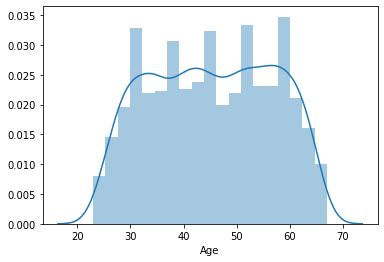

In [25]:
sns.distplot(bankloan.Age)
#age seems to be somewhat have a symetrical distribution

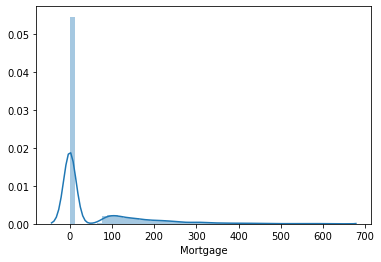

In [26]:
sns.distplot(bankloan.Mortgage)
#data is skewed and hence has to be normalised before performing algorithm

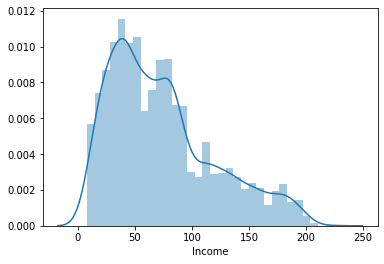

In [27]:
sns.distplot(bankloan.Income)
#Income is also skewed which is to be expected in reality

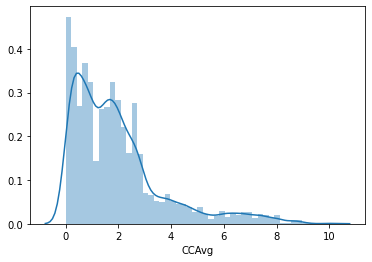

In [28]:
sns.distplot(bankloan.CCAvg)
#spending curve is also skewed to the right

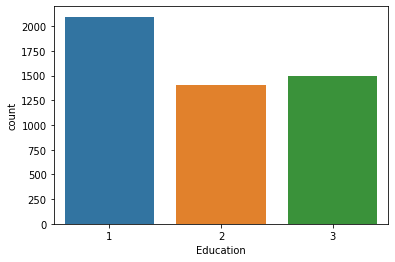

In [29]:
sns.countplot(bankloan.Education)

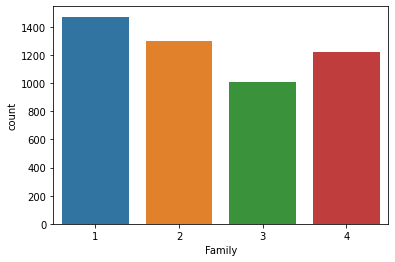

In [30]:
sns.countplot(bankloan.Family)

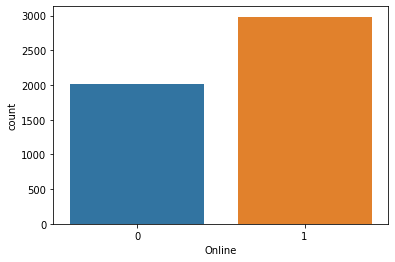

In [31]:
sns.countplot(bankloan.Online)

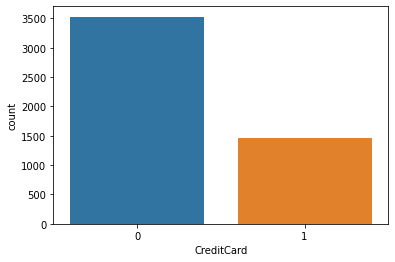

In [32]:
sns.countplot(bankloan.CreditCard)

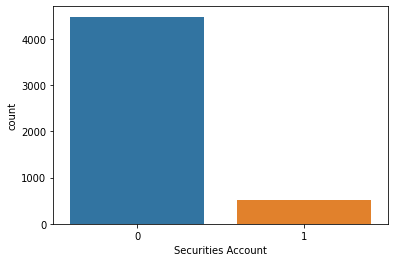

In [33]:
sns.countplot(x='Securities Account', data=bankloan)

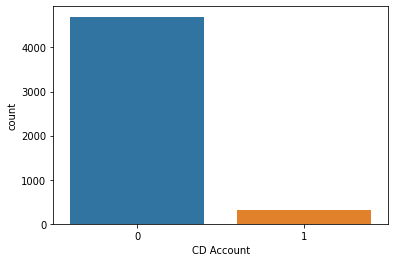

In [34]:
sns.countplot(x='CD Account',data=bankloan)

#Bivariate Analysis

analysing the relationship between various variables in relation to personal loans

In [35]:
bankloan.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')



> Personal loan and Educational level analysis



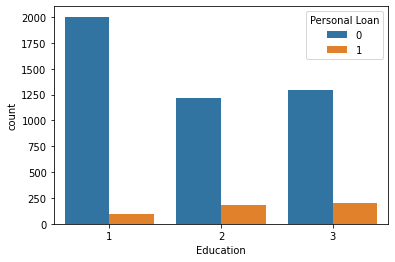

In [36]:
sns.countplot(x='Education',hue='Personal Loan',data=bankloan)

Among those who were granted personal loans, the educational background of these people were advanced professionals followed by graduates and undergrads but with very small difference between the various classes of people



> Personal Loan and Family Size Analysis


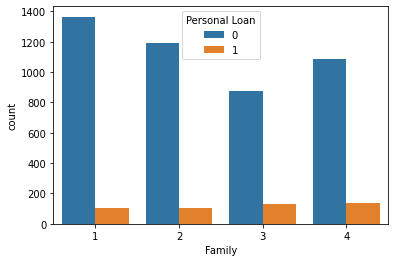

In [37]:
sns.countplot(x='Family',hue='Personal Loan', data=bankloan)

The number of family members doesnt affect the fact that a particular person decided to avail the loan



> Analysing correlation between family size & income for availing Personal loans



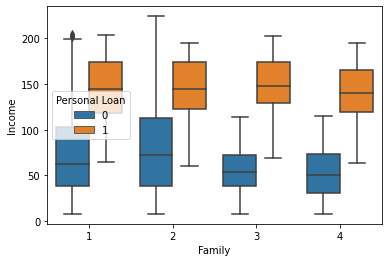

In [38]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=bankloan)


customers who have higher income across different family size is granted loans 



>Analysing correlation between family size & age for availing Personal loans



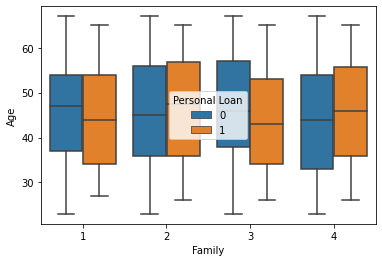

In [39]:
sns.boxplot(x='Family',y='Age',hue='Personal Loan',data=bankloan)


Age didnt play a significant role in deciding whether a person availed loans across various family sizes



> Analysing correlation between family size & CCAvg for availing Personal loans



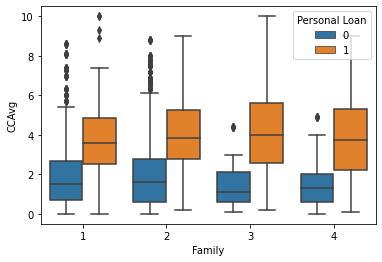

In [40]:
sns.boxplot(x='Family', y='CCAvg', hue='Personal Loan', data=bankloan)

This shows that people who had an average of higher credit card spending across various family sizes took the loan



> Analysing correlation between Educational Level & Income for availing Personal loans



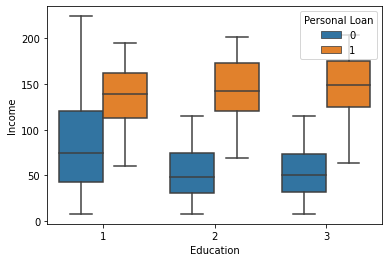

In [41]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data=bankloan)

Thus it might be safe to conclude that regardless of educational qualification, people with higher income were, in general, granted loans


> Analysing importance of CD Account for availing Personal loans



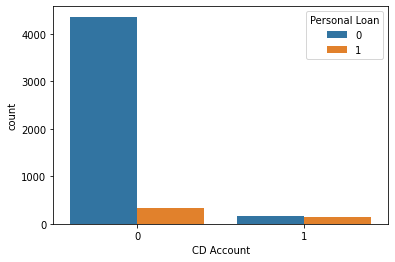

In [42]:
sns.countplot(x='CD Account', hue='Personal Loan', data=bankloan)

Most of the people who had personal loans didnt have a CD account


> Analysing importance of Securities Account for availing Personal loans



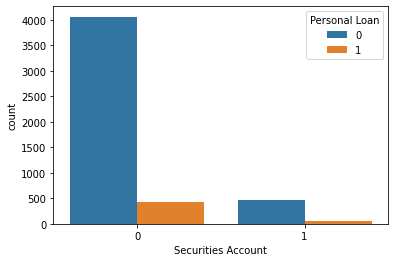

In [43]:
sns.countplot(x='Securities Account', hue='Personal Loan', data=bankloan)

It seems that majority of people who has personal loans doesnt have a securities account

Income and CCAvg seems to have significant impact on getting personal loans

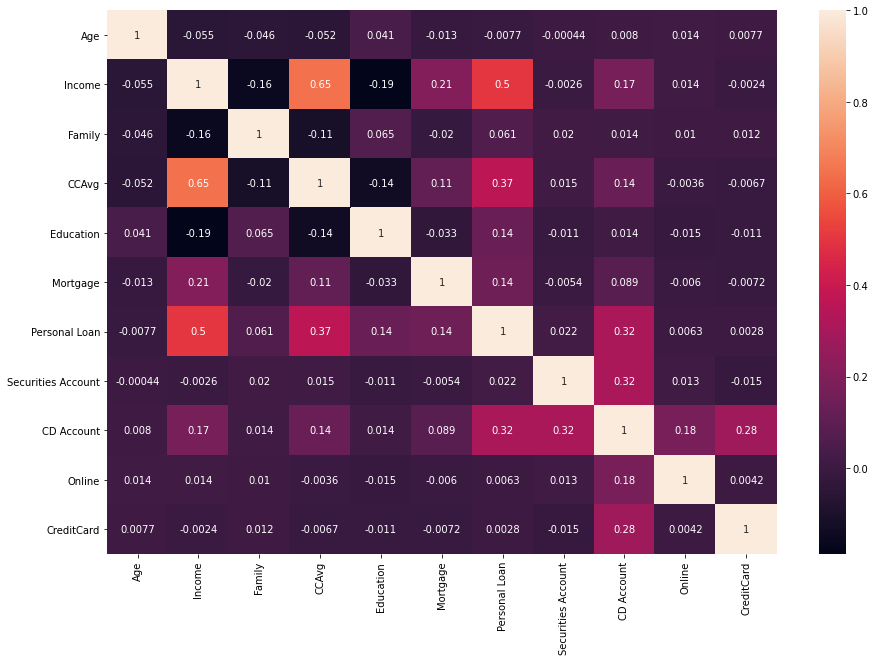

In [44]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(bankloan.corr(),annot=True)

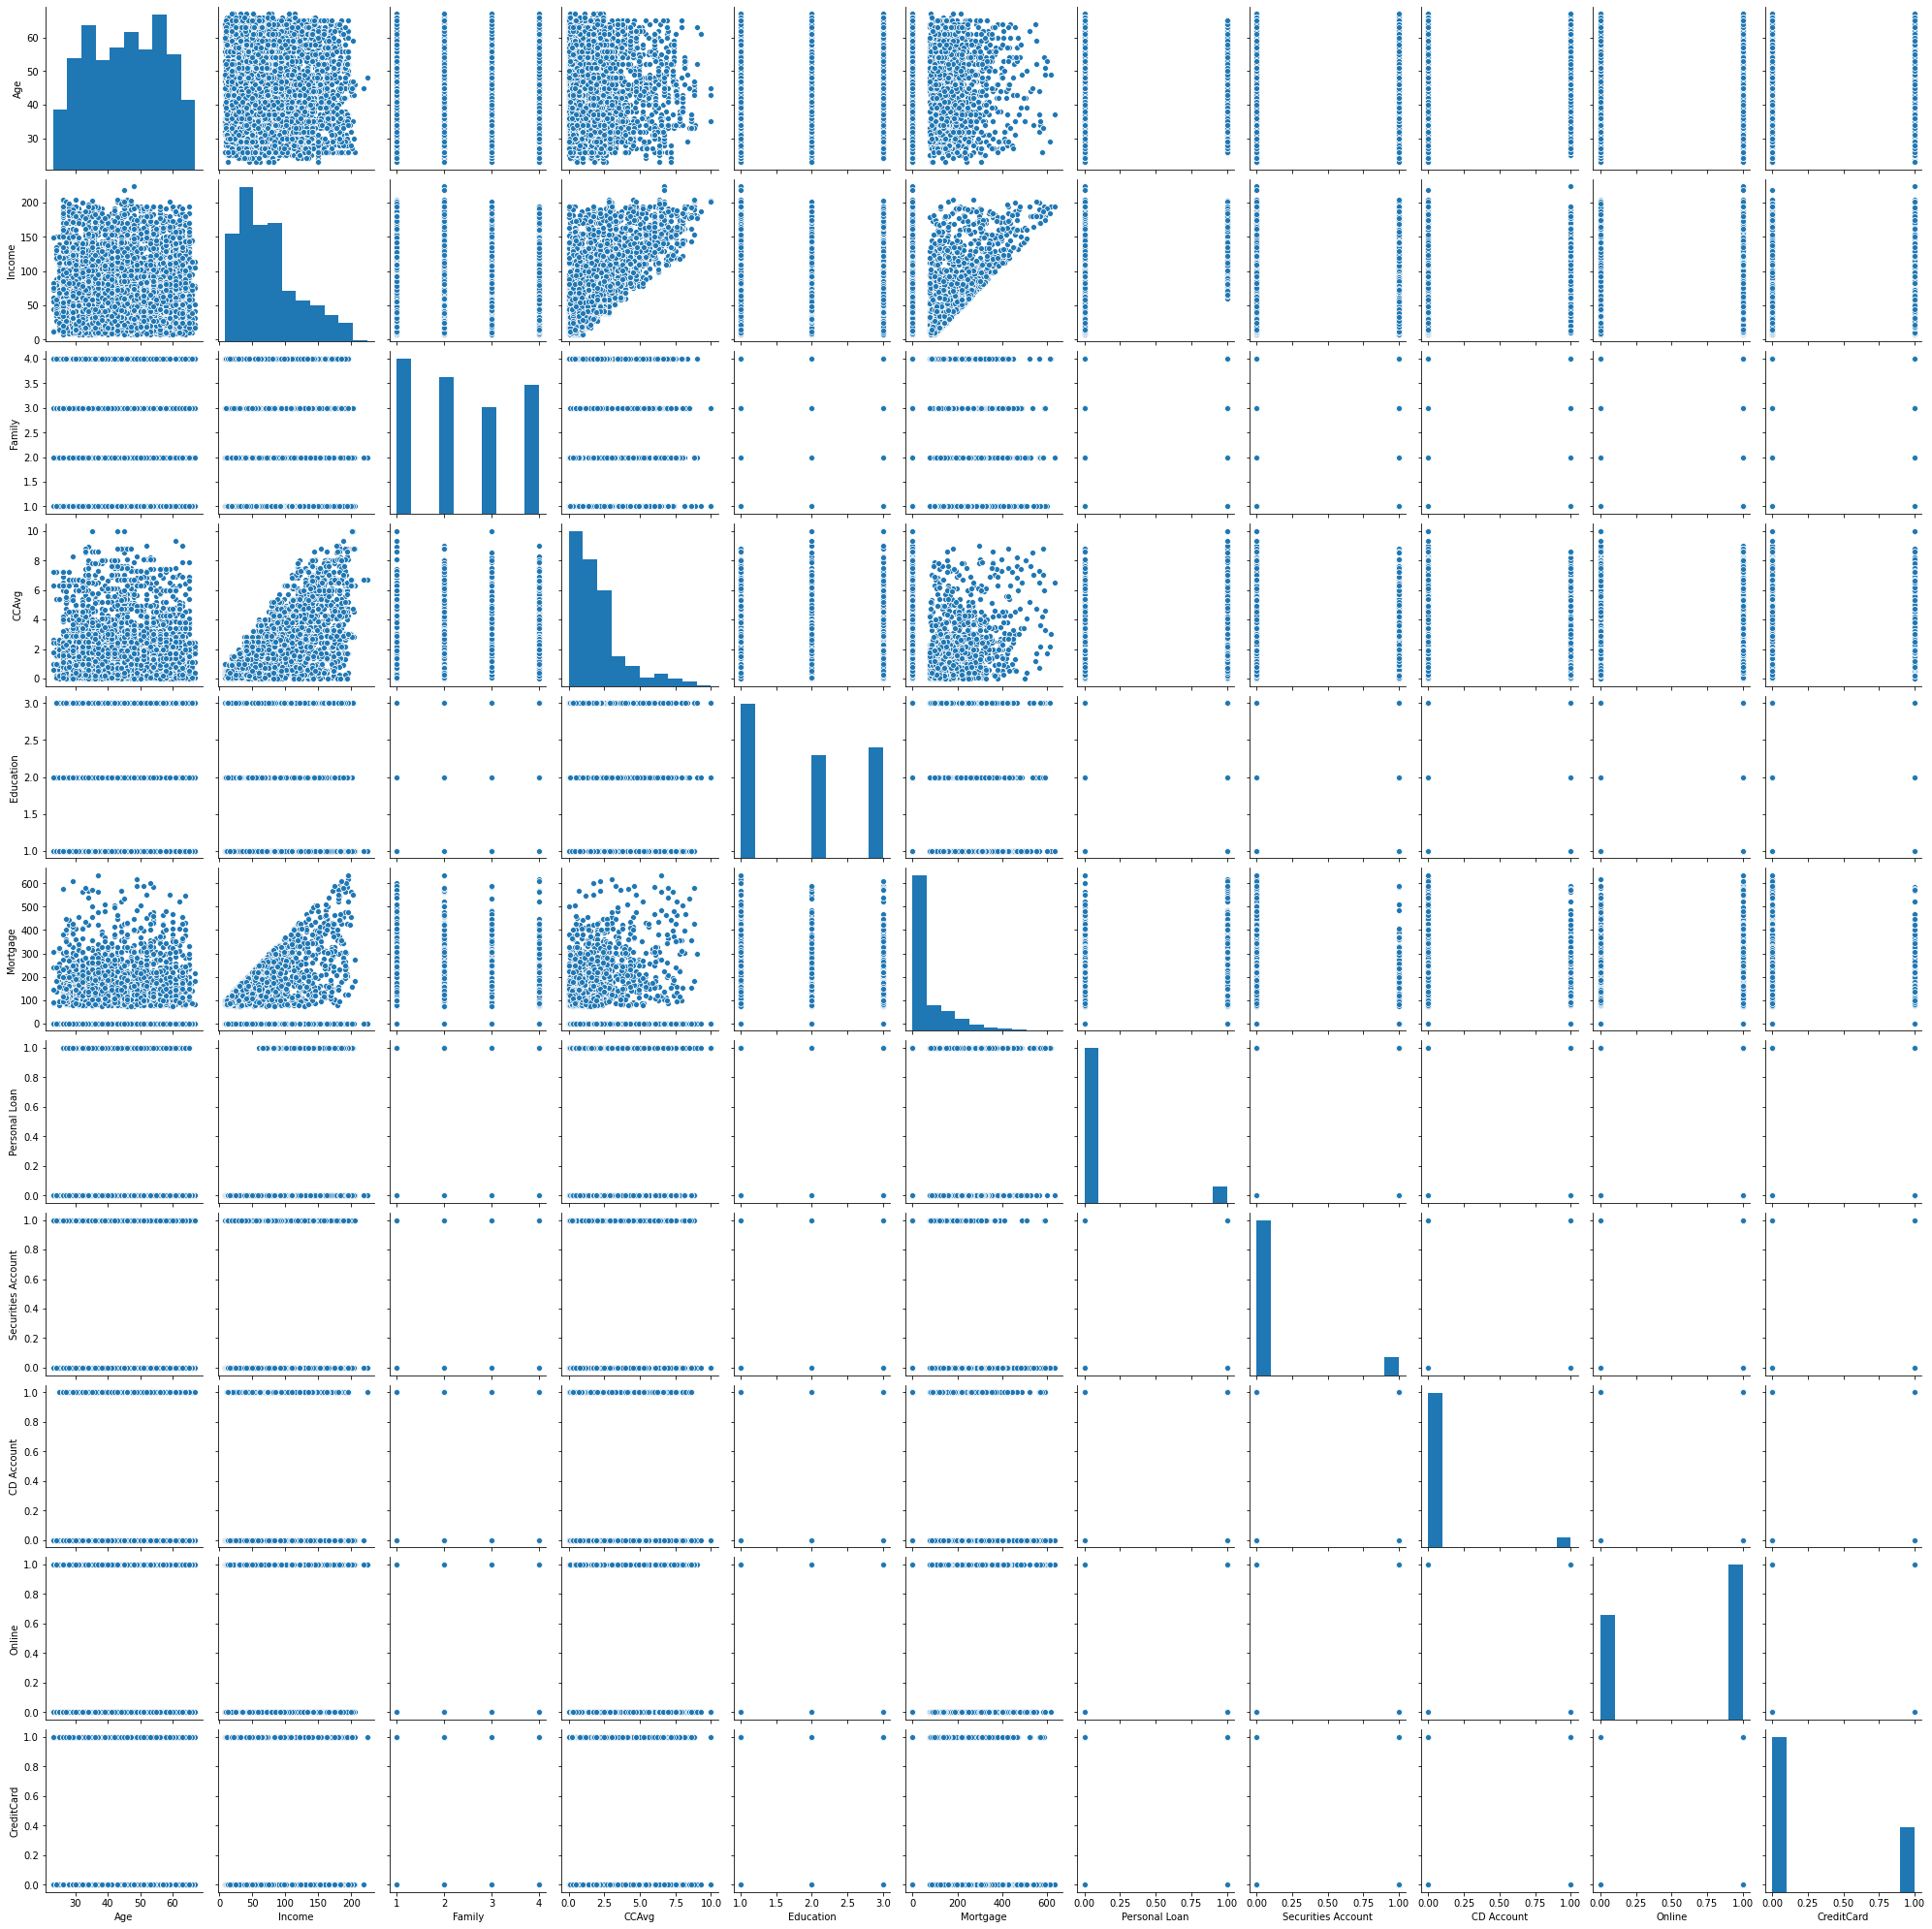

In [45]:
sns.pairplot(bankloan)

# Transformation of Variables



> Defining the variables, i.e, target and feature variables



In [46]:
data_X = bankloan.loc[:,bankloan.columns != 'Personal Loan']
data_Y = bankloan['Personal Loan']

>Transforming skewed income variable to a more normalised value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


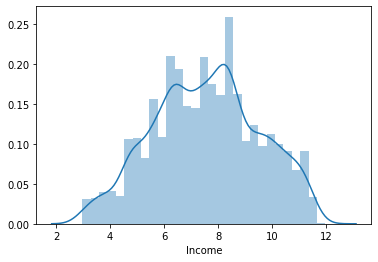

In [47]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
data_X["Income"]=pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(data_X["Income"])

>Transforming skewed CCAvg variable to a more normalised value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


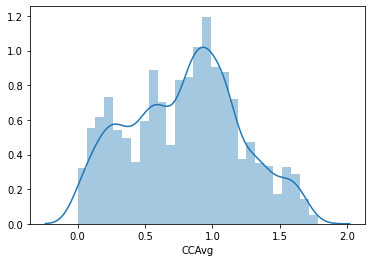

In [48]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X['CCAvg'].values.reshape(-1,1))
data_X['CCAvg'] = pt.transform(data_X['CCAvg'].values.reshape(-1,1))
sns.distplot(data_X['CCAvg'])

>Transforming skewed Mortgage variable to a more normalised value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


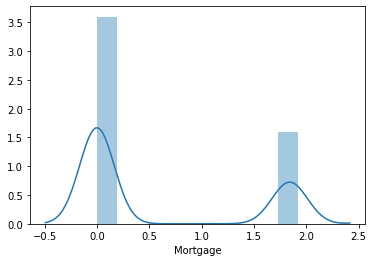

In [49]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X['Mortgage'].values.reshape(-1,1))
data_X['Mortgage'] =pt.transform(data_X['Mortgage'].values.reshape(-1,1))
sns.distplot(data_X['Mortgage'])


Since the mortgage variable shows discontinuity, power transformer fails to normalise the data. Hence we will try binning the data into ordinal categorical values to ensure the data is continuous.

In [50]:
#making the bins
bin=[0,100,200,300,400,500,600,700]
#making the labels
labels=[0,1,2,3,4,5,6]

data_X['Mortgage_binned'] = pd.cut(data_X['Mortgage'], bins=bin, labels=labels, include_lowest = True)

data_X = data_X.drop("Mortgage",axis=1)
data_X.head()



,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_binned
0,25,6.827583,4,0.845160,1,1,0,0,0,0
1,45,5.876952,3,0.814478,1,1,0,0,0,0
2,39,3.504287,1,0.633777,1,0,0,0,0,0
3,35,8.983393,1,1.107427,2,0,0,0,0,0
4,35,6.597314,4,0.633777,2,0,0,0,1,0


# Training A Model

Spiliting dataset into test and train datasets

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data_X,data_Y,test_size = 0.30,random_state=101)
X_train.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_binned
2654,60,6.827583,4,1.002438,1,1,0,1,0,0
2468,49,9.968805,1,1.623952,1,0,0,1,1,0
290,51,8.263480,1,1.419019,1,0,0,0,0,0
1463,35,8.779396,1,-0.000000,1,0,0,1,0,0
4508,27,8.454786,1,0.928941,1,0,0,1,1,0


##Applying a Logistic Regression model

In [52]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



> Making Predictions for the test set



In [53]:
prediction=logmodel.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(Y_test,prediction)
accuracy

array([[1343,   11],
       [  66,   80]])

In [55]:
#Testing Accuracy
logmodel.score(X_test,Y_test)

0.9486666666666667

The accuracy of our model for the test set is around 94.86%

In [56]:
#Training Accuracy
logmodel.score(X_train,Y_train)

0.9548571428571428

This is our model accuracy for the train set and it is around 95.48%
As the train and test set accuracies are almost equal, we can say that our model is a good model.

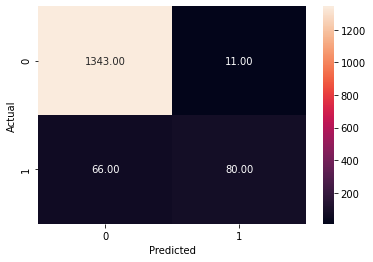

In [57]:
#Printing the Confusion Matrix
matrix = confusion_matrix(Y_test,prediction)
sns.heatmap(matrix, annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


However, eventhough we got good accuracies, our logistic regression model still reports 66 values as false negatives. This means 66 people who would have applied for loans were classified as people who wouldnt take loan by the algorithm.

>Printing The Report

In [58]:
from sklearn import metrics
print(metrics.classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1354
           1       0.88      0.55      0.68       146

    accuracy                           0.95      1500
   macro avg       0.92      0.77      0.82      1500
weighted avg       0.95      0.95      0.94      1500



##Applying Decision Tree model

In [59]:
from sklearn import tree
treemodel = tree.DecisionTreeClassifier(random_state=0, max_depth=8)
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [60]:
treepredict = treemodel.predict(X_test)


In [61]:
#testing accuracy
treemodel.score(X_test,Y_test)

0.9826666666666667

The accuracy for our model for test set is 98.3%

In [62]:
#Training Accuracy
treemodel.score(X_train,Y_train)

0.9971428571428571

The accuracy for our model for train set is 99.7%

Thus the decision tree model has higher test and train accuracies than logistic regression model.

In [63]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(Y_test,treepredict)
accuracy

array([[1344,   10],
       [  16,  130]])

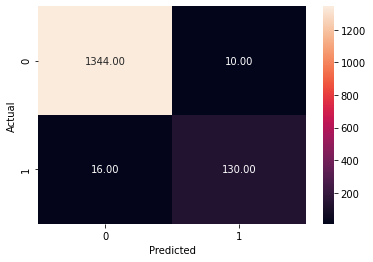

In [64]:
#Printing the confusion matrix
matrix = confusion_matrix(Y_test,treepredict)
sns.heatmap(matrix, annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


It reports only 16 values as false negatives. This is much lower than the 1st model we tried

>Printing the Report for Decision Tree Analysis

In [65]:
print(metrics.classification_report(Y_test,treepredict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1354
           1       0.93      0.89      0.91       146

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



##Applying the Random Forest Analysis

In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0, n_estimators=120, max_depth=8)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [67]:
prediction = model.predict(X_test)

In [68]:
#Testing Accuracy
model.score(X_test,Y_test)


0.986

The accuracy for test set is 98.6%

In [69]:
#Training Accuracy
model.score(X_train,Y_train)

0.9945714285714286

The accuracy for train set is 99.45%

The results obtained here is comparable to the decision tree model

In [70]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(Y_test,prediction)
accuracy

array([[1353,    1],
       [  20,  126]])

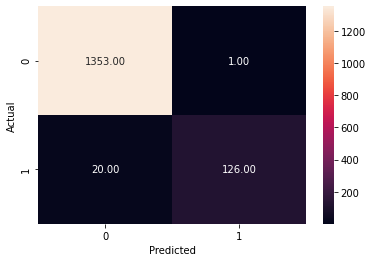

In [71]:
#Printing the confusion matrix
matrix = confusion_matrix(Y_test,prediction)
sns.heatmap(matrix, annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

However when compared to the decision tree model, the random forest model has higher false negatives. Thus we go for decision tree model which has a comparable accuracy and lower false negative rates.

>Printing the Report

In [72]:
print(metrics.classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1354
           1       0.99      0.86      0.92       146

    accuracy                           0.99      1500
   macro avg       0.99      0.93      0.96      1500
weighted avg       0.99      0.99      0.99      1500



#CONCLUSION


The process begins by importing various libraries required for importing and analysing the feature variables.

After importing our dataframe, we view the details about the datadset to see whether our data is complete and has all the values that it needs. We inspect the data for missing values and remove any redundancies. 

Our Observations were:

1. we soon found that the 'Experience' column had noisy data and decided to check its correlation with the other logically similar column, in our case 'Age' column and later drop our 'Experience' column.

2. Age was normally disrtributed, while other variables like income,CCAvg, etc were skewed. These skewed data were later normalised

3. We saw a important correlation between income and ccAvg with our test variable personal loans. People with significant income and credit card spending tend to apply for personal loans.

4. Data was divided into train and test set in 70:30 ratio and was fed to different models and their accuracies were compared

For our Machine Learning Model, we experimented with 3 different models, namely, Logistic Regression, Decision Tree, and Random  Forest Model.

The results for various models are shown below:

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##Decision Tree

Accuracy: 98.3%

                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1354
           1       0.93      0.89      0.91       146

     accuracy                          0.98      1500
     macro avg     0.96      0.94      0.95      1500
    weighted avg   0.98      0.98      0.98      1500
It had a confusion matrix as follows:

       [[1344,   10],[  16,  130]]
**Out of all the 3 models tested, decision tree had the highest accuracy and least false negatives**

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##Random Forest

Accuracy: 98.6%

                 precision    recall  f1-score   support

           0       0.99      1.00      0.99      1354
           1       0.99      0.86      0.92       146

     accuracy                           0.99      1500
    macro avg       0.99      0.93      0.96      1500
    weighted avg    0.99      0.99      0.99      1500

It had a confusion matrix as follows:

       [[1353, 1],[  20,  126]]

**This model had slightly higher false negative values as compared with the Decision Tree Model**

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##Logistic Regression

Accuracy: 94.86%

               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1354
           1       0.88      0.55      0.68       146

     accuracy                           0.95      1500  
    macro avg       0.92      0.77      0.82      1500
    weighted avg    0.95      0.95      0.94      1500

It had a confusion matrix as follows:

       [[1343 11],[ 66 80]]

**This model isnt preferred due to its large false negative values and comparitively lower accuracy**

Since in the business model that was provided, we had to predict which all customers took the personal loans, we logically had to minimise all the false negatives which could be a bad business model. Thus from the above analysis, it can be concluded that decision tree is a better model.

